# Table of contents

- [Introduction](#introduction)
- [Data Assessing](#data-assessing)
- [Data Cleaning](#data-cleaning)
- [Exploratory Analysis](#exploratory-analysis)

<a id='introduction'></a>
# INTRODUCTION

This is an analysis on causes of death, sectioned into two parts; 
1. Analysis on causes of deaths in the world
2. Analysis on causes of deaths in Nigeria 

The dataset collects information of over 8000 causes of death. 
  This analysis is focused on countries through the years 1990-2019.

In [2]:
# import necessary libraries needed
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import data for analysis
df=pd.read_csv('20220327 annual-number-of-deaths-by-cause.csv')

<a id='data-assessing'></a>
# DATA ASSESSING

In [4]:
# check the data
df

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,Zimbabwe,ZWE,2015,NaN,1439.0,11161.0,632.0,2518.0,770.0,1302.0,...,2990.0,NaN,16649.0,2108.0,2751.0,1956.0,4202.0,146.0,754.0,215.0
8250,Zimbabwe,ZWE,2016,NaN,1457.0,11465.0,648.0,2050.0,801.0,1342.0,...,3027.0,NaN,16937.0,2160.0,2788.0,1962.0,4264.0,146.0,767.0,219.0
8251,Zimbabwe,ZWE,2017,NaN,1460.0,11744.0,654.0,2116.0,818.0,1363.0,...,2962.0,0.0,17187.0,2196.0,2818.0,2007.0,4342.0,144.0,781.0,223.0
8252,Zimbabwe,ZWE,2018,NaN,1450.0,12038.0,657.0,2088.0,825.0,1396.0,...,2890.0,NaN,17460.0,2240.0,2849.0,2030.0,4377.0,139.0,795.0,227.0


In [5]:
# Assess data columns
df.columns

Index(['Entity', 'Code', 'Year',
       'Number of executions (Amnesty International)',
       'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Bo

In [6]:
df.dtypes

Entity                                                                                       object
Code                                                                                         object
Year                                                                                          int64
Number of executions (Amnesty International)                                                 object
Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                    float64
Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)                                     float64
Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)                float64
Deaths - Malaria - Sex: Both - Age: All Ages (Number)                                       float64
Deaths - Drowning - Sex: Both - Age: All Ages (Number)                                      float64
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)                        float64


In [7]:
df['Year'].describe()

count    8254.000000
mean     2004.448025
std         8.642230
min      1990.000000
25%      1997.000000
50%      2004.000000
75%      2012.000000
max      2019.000000
Name: Year, dtype: float64

<a id='data-cleaning'></a>
# DATA CLEANING 

In [8]:
# drop Amnesty International column
df.drop('Number of executions (Amnesty International)', axis = 1, inplace = True)

# confirm it has been dropped
df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol 

In [9]:
# change column names 
current_column = ['Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
       'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
       'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
       'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
       'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
       'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
       'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
       'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
       'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)',
       'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
       'Deaths - Poisonings - Sex: Both - Age: All Ages (Number)',
       'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)',
       'Terrorism (deaths)',
       'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
       'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
       'Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)',
       'Deaths - Alzheimer\'s disease and other dementias - Sex: Both - Age: All Ages (Number)',
       'Deaths - Parkinson\'s disease - Sex: Both - Age: All Ages (Number)']

new_column = ['Meningitis', 'Neoplasms', 'Fire, heat, and hot substances', 'Malaria',
             'Drowning', 'Interpersonal violence', 'HIV/AIDS', 'Drug use disorders',
             'Tuberculosis', 'Road injuries', 'Maternal disorders', 'Lower respiratory infections',
             'Neonatal disorders', 'Alcohol use disorders', 'Exposure to forces of nature',
             'Diarrheal diseases', 'Environmental heat and cold exposure', 'Nutritional deficiencies',
             'Self-harm', 'Conflict and terrorism', 'Diabetes mellitus', 'Poisonings',
             'Protein-energy malnutrition', 'Terrorism', 'Cardiovascular diseases',
             'Chronic kidney disease', 'Chronic respiratory diseases',
             'Cirrhosis and other chronic liver diseases', 'Digestive diseases', 'Acute hepatitis', 
             'Alzheimer\'s disease and other dementias', 'Parkinson\'s disease']

column_mapping = dict(zip(current_column, new_column))

# Rename columns
df.rename(columns=column_mapping, inplace=True)

df.columns

Index(['Entity', 'Code', 'Year', 'Meningitis', 'Neoplasms',
       'Fire, heat, and hot substances', 'Malaria', 'Drowning',
       'Interpersonal violence', 'HIV/AIDS', 'Drug use disorders',
       'Tuberculosis', 'Road injuries', 'Maternal disorders',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Nutritional deficiencies', 'Self-harm', 'Conflict and terrorism',
       'Diabetes mellitus', 'Poisonings', 'Protein-energy malnutrition',
       'Terrorism', 'Cardiovascular diseases', 'Chronic kidney disease',
       'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Acute hepatitis', 'Alzheimer's disease and other dementias',
       'Parkinson's disease'],
      dtype='object')

In [10]:
# unpivot table for better view
df_Clean = pd.melt(df, id_vars=['Entity', 'Code', 'Year'], value_vars = ['Meningitis',
       'Neoplasms', 'Fire, heat, and hot substances', 'Malaria', 'Drowning',
       'Interpersonal violence', 'HIV/AIDS', 'Drug use disorders',
       'Tuberculosis', 'Road injuries', 'Maternal disorders',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Nutritional deficiencies', 'Self-harm', 'Conflict and terrorism',
       'Diabetes mellitus', 'Poisonings', 'Protein-energy malnutrition',
       'Terrorism', 'Cardiovascular diseases', 'Chronic kidney disease',
       'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Acute hepatitis',
       'Alzheimer\'s disease and other dementias',
       'Parkinson\'s disease'],
                   var_name= 'Causes', value_name='Number of Deaths')

df_Clean

,Entity,Code,Year,Causes,Number of Deaths
0,Afghanistan,AFG,2007,Meningitis,2933.0
1,Afghanistan,AFG,2008,Meningitis,2731.0
2,Afghanistan,AFG,2009,Meningitis,2460.0
3,Afghanistan,AFG,2011,Meningitis,2327.0
4,Afghanistan,AFG,2012,Meningitis,2254.0
...,...,...,...,...,...
264123,Zimbabwe,ZWE,2015,Parkinson's disease,215.0
264124,Zimbabwe,ZWE,2016,Parkinson's disease,219.0
264125,Zimbabwe,ZWE,2017,Parkinson's disease,223.0
264126,Zimbabwe,ZWE,2018,Parkinson's disease,227.0


In [11]:
df_Clean.sample(20)

,Entity,Code,Year,Causes,Number of Deaths
39111,Samoa,WSM,1990,Drowning,12.0
42847,China,CHN,2009,Interpersonal violence,20659.0
243018,Ireland,IRL,2003,Acute hepatitis,1.0
129385,Palau,PLW,2010,Diarrheal diseases,1.0
149814,Canada,CAN,2014,Self-harm,4756.0
55639,Samoa,WSM,2010,HIV/AIDS,7.0
234035,Georgia,GEO,2006,Digestive diseases,1941.0
207503,Burundi,BDI,2015,Chronic kidney disease,924.0
16120,Wales,NaN,1994,Neoplasms,9057.0
71186,Nigeria,NGA,2004,Tuberculosis,65773.0


The Entity column has entry of regions,Continents instead of country and these entries have missing values in the Code column

In [12]:
# Assess Entity column
df_Clean['Entity'].unique()

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia',
       'Australasia & Oceania', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Bosnia-Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central America & Caribbean',
       'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Lo

There is presence of continents, regions and the likes in this column, since my analysis is based on countries I wont be needing them.

In [13]:
# check for missing value in new table
df_Clean.isna().sum()

Entity                  0
Code                65536
Year                    0
Causes                  0
Number of Deaths    12927
dtype: int64

In [14]:
# drop missing values 
df_Clean.dropna(inplace=True)

# to confirm all missing values have been dropped 
df_Clean.isnull().sum()

Entity              0
Code                0
Year                0
Causes              0
Number of Deaths    0
dtype: int64

In [15]:
# confirm all irrelevant entry has been dropped
df_Clean['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

There is still an instance of 'world' as an entry

In [16]:
# drop where 'world' is an entry in the entity column
df_Clean= df_Clean.drop(df_Clean[df_Clean['Entity'] == 'World'].index)

# confirm 
df_Clean['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [17]:
df_Clean

,Entity,Code,Year,Causes,Number of Deaths
0,Afghanistan,AFG,2007,Meningitis,2933.0
1,Afghanistan,AFG,2008,Meningitis,2731.0
2,Afghanistan,AFG,2009,Meningitis,2460.0
3,Afghanistan,AFG,2011,Meningitis,2327.0
4,Afghanistan,AFG,2012,Meningitis,2254.0
...,...,...,...,...,...
264123,Zimbabwe,ZWE,2015,Parkinson's disease,215.0
264124,Zimbabwe,ZWE,2016,Parkinson's disease,219.0
264125,Zimbabwe,ZWE,2017,Parkinson's disease,223.0
264126,Zimbabwe,ZWE,2018,Parkinson's disease,227.0


<a id='exploratory-analysis'></a>
# EXPLORATORY ANALYSIS

# PART 1 - Cause Of Deaths In The World

##   Is there yearly increase in number of deaths across the world?

In [18]:
# to get total number of deaths per year
yearly_deaths =df_Clean[['Number of Deaths','Year']].groupby(['Year']).sum().reset_index()
yearly_deaths

,Year,Number of Deaths
0,1990,43525671.0
1,1991,44068156.0
2,1992,44468821.0
3,1993,45185711.0
4,1994,46190299.0
5,1995,46183076.0
6,1996,46327571.0
7,1997,46683280.0
8,1998,47070777.0
9,1999,47655481.0


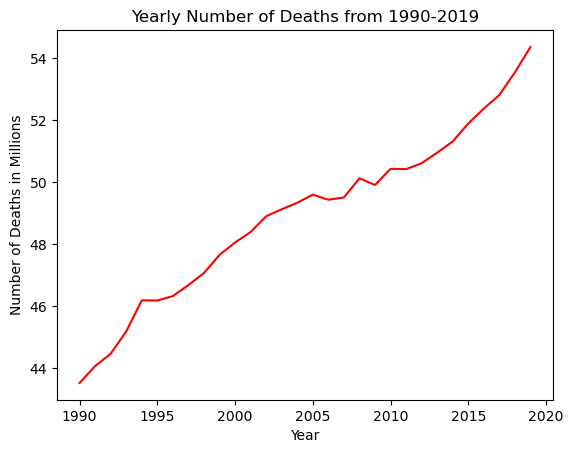

In [25]:
# visualization of yearly number of deaths
sns.lineplot(x= yearly_deaths['Year'], y= yearly_deaths['Number of Deaths']/1e6, color='red')
plt.title('Yearly Number of Deaths from 1990-2019')
plt.xlabel('Year')
plt.ylabel('Number of Deaths in Millions');

Over the years there is an increase in yearly number of deaths. Tho there was a little oscillation between the year 2005 and 2010

## What is the major cause of death in the world?

In [20]:
# to get the major cause of deaths
causes_death = df_Clean[['Causes','Number of Deaths']].groupby('Causes').sum().sort_values('Number of Deaths', ascending= False).reset_index()
causes_death

,Causes,Number of Deaths
0,Cardiovascular diseases,447741982.0
1,Neoplasms,229758530.0
2,Chronic respiratory diseases,104605337.0
3,Lower respiratory infections,83770039.0
4,Neonatal disorders,76860737.0
5,Diarrheal diseases,66235505.0
6,Digestive diseases,65638638.0
7,Tuberculosis,45850602.0
8,Cirrhosis and other chronic liver diseases,37479314.0
9,HIV/AIDS,36364418.0


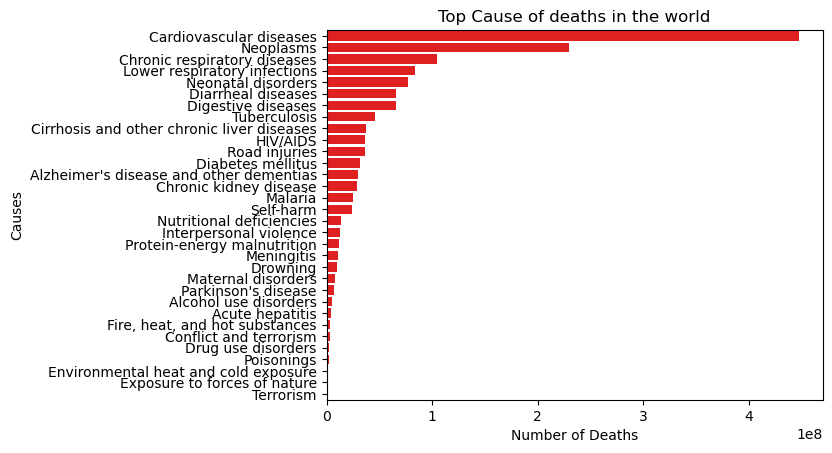

In [21]:
sns.barplot(x= causes_death['Number of Deaths'], y= causes_death['Causes'], color= 'red')
plt.title('Top Cause of deaths in the world')
plt.xlabel('Number of Deaths')
plt.ylabel('Causes');

Cardiovascular Diseases, Neoplasms, Chronic respiratory Diseases are the top cause of deaths over the world.

## Which Country had the highest number of deaths?

In [22]:
# to get country with highest death causes 
country_deaths = df_Clean[['Entity', 'Number of Deaths']].groupby('Entity').sum().sort_values('Number of Deaths', ascending = False).reset_index()
country_deaths= country_deaths.head(20)
country_deaths

,Entity,Number of Deaths
0,China,265409095.0
1,India,238174375.0
2,United States,71201339.0
3,Russia,59595464.0
4,Indonesia,44048079.0
5,Nigeria,43692688.0
6,Pakistan,38175200.0
7,Brazil,32674246.0
8,Japan,31922848.0
9,Germany,25559752.0


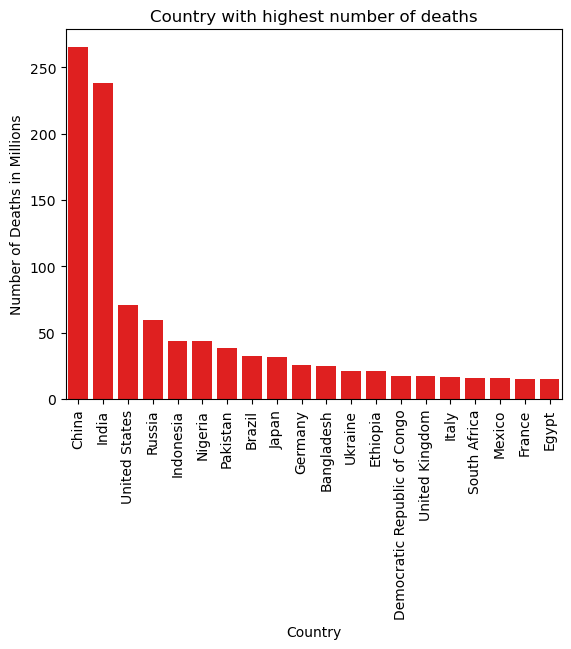

In [24]:
# visualization of country with highest number of deaths
sns.barplot(x= country_deaths['Entity'], y= country_deaths['Number of Deaths']/1e6, color= 'red')
plt.title('Country with highest number of deaths')
plt.xlabel('Country')
plt.ylabel('Number of Deaths in Millions')
plt.xticks(rotation= 90);

china has the highest number of deaths, summing over 200 million deaths followed closely by India, what could be the cause of deaths in china?

In [24]:
# filter to get china data
df_Cleanchina = df_Clean[df_Clean['Entity']== 'China']

# to get cause of deaths in china
causes_death_china = df_Cleanchina[['Causes','Number of Deaths']].groupby('Causes').sum().sort_values('Number of Deaths', ascending= False).reset_index()
causes_death_china

,Causes,Number of Deaths
0,Cardiovascular diseases,100505973.0
1,Neoplasms,61060528.0
2,Chronic respiratory diseases,36676826.0
3,Digestive diseases,8924906.0
4,Lower respiratory infections,8525819.0
5,Road injuries,8350399.0
6,Alzheimer's disease and other dementias,5381846.0
7,Self-harm,5078550.0
8,Cirrhosis and other chronic liver diseases,4918899.0
9,Neonatal disorders,4353667.0


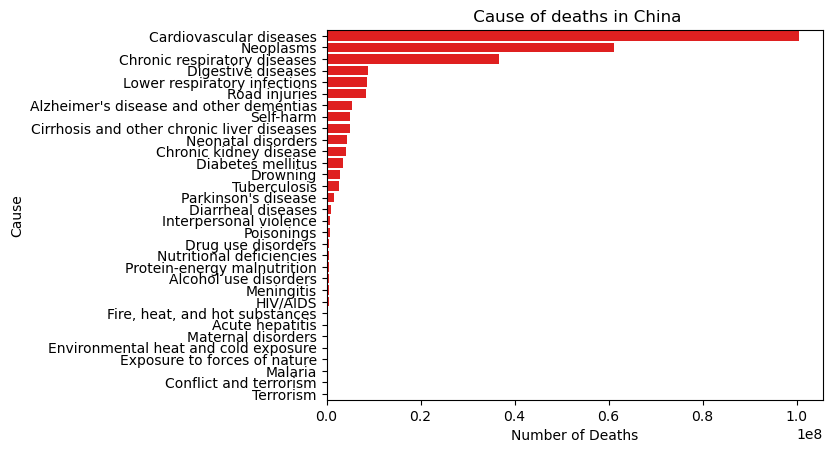

In [25]:
# visualization of cause of death in china
sns.barplot(x= causes_death_china['Number of Deaths'], y= causes_death_china['Causes'], color='red')
plt.title(' Cause of deaths in China')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause');

This shows that the major cause of death in china was the same as the world, deaths in China were mostly caused by Cardiovascular diseases, Neoplasms, Chronic respiratory diseases



# PART 2: Nigerian Death investigation: Cause Of Deaths In Nigeria

in this section my analysis will be focused on the questions below 

1. Is the total deaths in Nigeria increasing yearly since 1990? 

2. Is the yearly deaths higher than the yearly birth? If so do they correlate? What is the trend?

3. If Nigeria were to receive funding to prevent death rates, which 3 death causes should the funds go to, to raise awareness of the problem

5. Which year and category had the highest death amount in Nigeria?

In [26]:
# filter to get nigeria data
df_Nig_deaths = df_Clean[df_Clean['Entity'] == 'Nigeria']
df_Nig_deaths

,Entity,Code,Year,Causes,Number of Deaths
5135,Nigeria,NGA,2007,Meningitis,57314.0
5136,Nigeria,NGA,2008,Meningitis,56276.0
5137,Nigeria,NGA,2009,Meningitis,59349.0
5138,Nigeria,NGA,2013,Meningitis,52141.0
5139,Nigeria,NGA,2016,Meningitis,49572.0
...,...,...,...,...,...
261034,Nigeria,NGA,2014,Parkinson's disease,2945.0
261035,Nigeria,NGA,2015,Parkinson's disease,3025.0
261036,Nigeria,NGA,2017,Parkinson's disease,3130.0
261037,Nigeria,NGA,2018,Parkinson's disease,3234.0


## Is the yearly deaths in Nigeria increasing since 1990?

In [27]:
# to get the number of deaths per year
df_Nig_deaths_yearly_deaths =df_Nig_deaths[['Number of Deaths','Year']].groupby(['Year']).sum().reset_index()
df_Nig_deaths_yearly_deaths

,Year,Number of Deaths
0,1990,1169882.0
1,1991,1215101.0
2,1992,1235700.0
3,1993,1267130.0
4,1994,1299980.0
5,1995,1331943.0
6,1996,1378453.0
7,1997,1397465.0
8,1998,1432393.0
9,1999,1469547.0


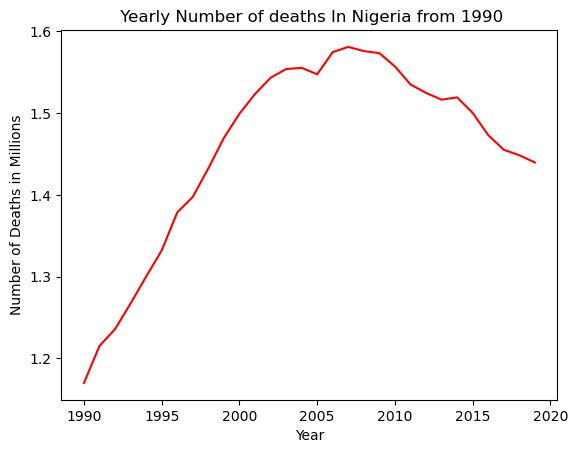

In [52]:
# visualization to show yearly deaths from 1990 to 2019
sns.lineplot(x= df_Nig_deaths_yearly_deaths['Year'], y= df_Nig_deaths_yearly_deaths['Number of Deaths']/1e6, color='red')
plt.title(' Yearly Number of deaths In Nigeria from 1990')
plt.xlabel('Year')
plt.ylabel('Number of Deaths in Millions');

The line graph above shows an upwards trend of deaths in Nigeria. There is a consistent upwards trend until 2009 where a significant drop occured.

## Does the Yearly death correlate with the yearly birth?

For this question I needed a dataset on number of births in Nigeria Which I couldn't get, so I made use of the [birth rate](https://www.macrotrends.net/countries/NGA/nigeria/birth-rate) and [population](https://www.macrotrends.net/countries/NGA/nigeria/population) dataset for this analysis

Firstly I compared Nigeria's Yearly Deaths Against Yearly Births then viualized their correlation

In [29]:
# import the birth rate and population dataset
birth_rate= pd.read_csv('nigeria-population-2024-01-19.csv')
population = pd.read_csv('nigeria-population-2024-01-20.csv')

In [30]:
# check the birth_rate data
birth_rate

,date,Births per 1000 People,Annual % Change
0,1950-12-31,46.007,NaN
1,1951-12-31,46.048,0.09
2,1952-12-31,46.090,0.09
3,1953-12-31,46.132,0.09
4,1954-12-31,46.174,0.09
...,...,...,...
146,2096-12-31,16.751,-0.82
147,2097-12-31,16.611,-0.84
148,2098-12-31,16.472,-0.84
149,2099-12-31,16.333,-0.84


In [31]:
#check the population data
population

,date,Population,Annual % Change
0,1950-12-31,37189369,NaN
1,1951-12-31,37903171,1.92
2,1952-12-31,38624425,1.90
3,1953-12-31,39347719,1.87
4,1954-12-31,40082479,1.87
...,...,...,...
146,2096-12-31,542202605,0.23
147,2097-12-31,543330974,0.21
148,2098-12-31,544348046,0.19
149,2099-12-31,545269101,0.17


In [32]:
# join the birth_rate and population data
df_Nig_birth = pd.merge(birth_rate, population, on= 'date', how= 'inner')
df_Nig_birth

,date,Births per 1000 People,Annual % Change_x,Population,Annual % Change_y
0,1950-12-31,46.007,NaN,37189369,NaN
1,1951-12-31,46.048,0.09,37903171,1.92
2,1952-12-31,46.090,0.09,38624425,1.90
3,1953-12-31,46.132,0.09,39347719,1.87
4,1954-12-31,46.174,0.09,40082479,1.87
...,...,...,...,...,...
146,2096-12-31,16.751,-0.82,542202605,0.23
147,2097-12-31,16.611,-0.84,543330974,0.21
148,2098-12-31,16.472,-0.84,544348046,0.19
149,2099-12-31,16.333,-0.84,545269101,0.17


In [33]:
# Assess the columns
df_Nig_birth.columns

Index(['date', ' Births per 1000 People', ' Annual % Change_x', ' Population',
       ' Annual % Change_y'],
      dtype='object')

 There is presence of leading whitespaces in the column names

In [34]:
# remove whitespace in column names
df_Nig_birth.columns = df_Nig_birth.columns.str.strip()
df_Nig_birth.columns

Index(['date', 'Births per 1000 People', 'Annual % Change_x', 'Population',
       'Annual % Change_y'],
      dtype='object')

In [35]:
# drop unnecessary columns
df_Nig_birth.drop(columns= ['Annual % Change_x', 'Annual % Change_y'], axis=1, inplace= True)
df_Nig_birth

,date,Births per 1000 People,Population
0,1950-12-31,46.007,37189369
1,1951-12-31,46.048,37903171
2,1952-12-31,46.090,38624425
3,1953-12-31,46.132,39347719
4,1954-12-31,46.174,40082479
...,...,...,...
146,2096-12-31,16.751,542202605
147,2097-12-31,16.611,543330974
148,2098-12-31,16.472,544348046
149,2099-12-31,16.333,545269101


In [36]:
# create number of births column
df_Nig_birth['Number of births'] = (df_Nig_birth['Births per 1000 People'] * df_Nig_birth['Population']) / 1000
df_Nig_birth

,date,Births per 1000 People,Population,Number of births
0,1950-12-31,46.007,37189369,1.710971e+06
1,1951-12-31,46.048,37903171,1.745365e+06
2,1952-12-31,46.090,38624425,1.780200e+06
3,1953-12-31,46.132,39347719,1.815189e+06
4,1954-12-31,46.174,40082479,1.850768e+06
...,...,...,...,...
146,2096-12-31,16.751,542202605,9.082436e+06
147,2097-12-31,16.611,543330974,9.025271e+06
148,2098-12-31,16.472,544348046,8.966501e+06
149,2099-12-31,16.333,545269101,8.905880e+06


In [37]:
# check the datatypes
df_Nig_birth.dtypes

date                       object
Births per 1000 People    float64
Population                  int64
Number of births          float64
dtype: object

The date column has a wrong datatype

In [38]:
# change datatype of date column 
df_Nig_birth['date'] = pd.to_datetime(df_Nig_birth['date']).dt.year
df_Nig_birth.dtypes

date                        int32
Births per 1000 People    float64
Population                  int64
Number of births          float64
dtype: object

In [39]:
# filter to get data from year 1990 - 2024
df_Nig_birth = df_Nig_birth.drop(df_Nig_birth[(df_Nig_birth['date'] < 1990) | (df_Nig_birth['date'] > 2019)].index)
df_Nig_birth

,date,Births per 1000 People,Population,Number of births
40,1990,44.455,95214257,4.232750e+06
41,1991,44.221,97685360,4.319744e+06
42,1992,43.986,100182045,4.406607e+06
43,1993,43.751,102775465,4.496529e+06
44,1994,43.656,105456121,4.603792e+06
45,1995,43.561,108187610,4.712760e+06
46,1996,43.465,110956183,4.822710e+06
47,1997,43.370,113791181,4.935124e+06
48,1998,43.275,116690527,5.049783e+06
49,1999,43.211,119695565,5.172165e+06


In [40]:
df_Nig_birth.rename(columns = {'date':'Year'}, inplace = True) 
df_Nig_birth.columns

Index(['Year', 'Births per 1000 People', 'Population', 'Number of births'], dtype='object')

#### Nigeria's Yearly Deaths Against Yearly Births

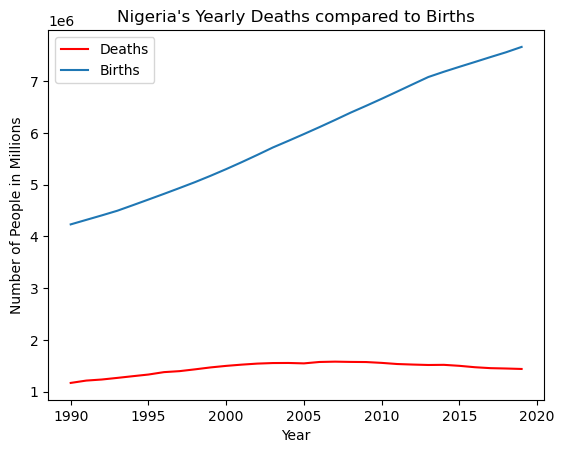

In [41]:
# visualization of yearly deaths aginst yearly births in Nigeria
sns.lineplot(x=df_Nig_deaths_yearly_deaths['Year'], y=df_Nig_deaths_yearly_deaths['Number of Deaths'], label='Deaths', color= 'red')
sns.lineplot(x=df_Nig_birth['Year'], y=df_Nig_birth['Number of births'], label='Births')
plt.title('Nigeria\'s Yearly Deaths compared to Births')
plt.ylabel("Number of People in Millions")
#plt.yscale('log')
plt.show()

This shows that Nigeria's yearly births is dramatically higher than the yearly deaths. The annual birth amount is about 8x higher than the annual death.Both events have an upward trend.

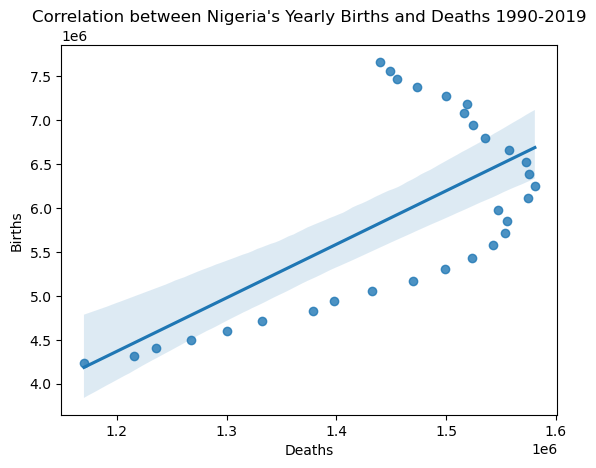

In [42]:
# visualization of yearly deaths and births correlation in Nigeria
corrDataset = pd.merge(df_Nig_deaths_yearly_deaths[['Year','Number of Deaths']], df_Nig_birth[['Year','Number of births']], on=['Year'])
corrDataset.reset_index(drop=True, inplace=True)

plt.title("Correlation between Nigeria's Yearly Births and Deaths 1990-2019")
sns.regplot(y='Number of births', x='Number of Deaths', data=corrDataset)
plt.xlabel("Deaths")
plt.ylabel("Births")
plt.show()

There was an evident upwards trend of high births = high deaths showing strong correlation between the deaths and births until around 2005 when the correlation became generally negative.

## Which Cause of deaths needs funding?

In [43]:
# to get top cause of deaths in Nigeria
nig_causes_death = df_Nig_deaths[['Causes','Number of Deaths']].groupby('Causes').sum().sort_values('Number of Deaths', ascending= False).reset_index()
nig_causes_death

,Causes,Number of Deaths
0,Diarrheal diseases,7449328.0
1,Malaria,6422063.0
2,Lower respiratory infections,5917528.0
3,Neonatal disorders,5262229.0
4,Cardiovascular diseases,4176488.0
5,HIV/AIDS,2216718.0
6,Tuberculosis,1769390.0
7,Digestive diseases,1716202.0
8,Neoplasms,1618730.0
9,Meningitis,1520376.0


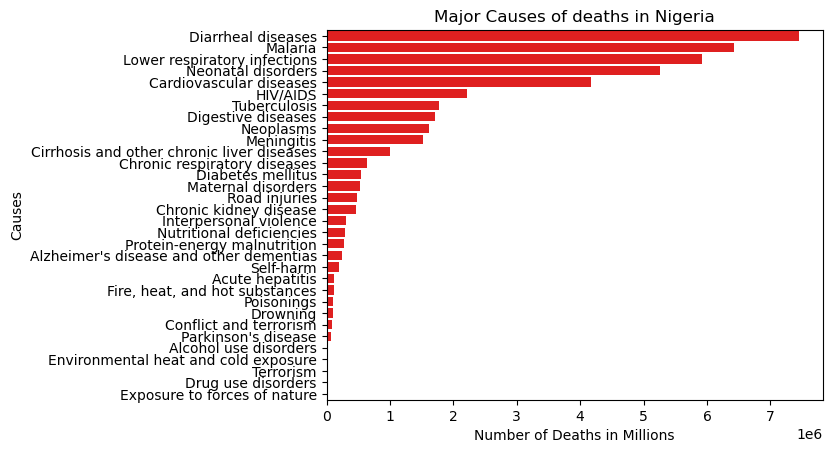

In [44]:
# visualization of major causes of deaths in Nigeria
sns.barplot(x= nig_causes_death['Number of Deaths'], y= nig_causes_death['Causes'], color= 'red')
plt.title('Major Causes of deaths in Nigeria')
plt.xlabel('Number of Deaths in Millions')
plt.ylabel('Causes');

Top three most common death causes are Diarrheal diseases, Malaria, Lower respiratory infections. Diarrheal diseases such as cholera, often spread from contaminated food or drinking-water as a result of poor hygiene. To prevent this, funding will need to be spent on improved water, awareness on proper hygiene and quality sanitation

Malaria whose cause can also be attributed to lack of proper sanitaion will need funding on awareness on importance of proper sanitaion

The third most common cause of deaths in Nigeria is Lower respiratory infections, example is pneumonia, mostly caused by Bacteria, viruses and environmental factors like air pollution and smoking. Funding should be spent spent on the awareness of dangers of air pollution and smoking.

## Which year and category had the highest death amount in Nigeria?

In [45]:
# to get the year and category with highest deaths
nig_year_causes_death = df_Nig_deaths[['Year', 'Causes','Number of Deaths']].groupby(['Year', 'Causes']).sum().sort_values('Number of Deaths', ascending= False)
nig_year_causes_death

,,Number of Deaths
Year,Causes,
1991,Diarrheal diseases,297403.0
1990,Diarrheal diseases,284419.0
1992,Diarrheal diseases,281303.0
2008,Malaria,280604.0
2009,Malaria,276715.0
...,...,...
2000,Terrorism,0.0
1995,Exposure to forces of nature,0.0
1993,Exposure to forces of nature,0.0


In [46]:
# to show aggragated sum of deaths for each death causes per year
a= pd.pivot_table(df_Nig_deaths, values='Number of Deaths', columns='Year', index='Causes')
a

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Causes,,,,,,,,,,,,,,,,,,,,,
Acute hepatitis,4292.0,4475.0,4628.0,4666.0,4825.0,5022.0,5067.0,5178.0,5246.0,5219.0,...,3300.0,3205.0,3128.0,3040.0,2935.0,2807.0,2761.0,2699.0,2595.0,2540.0
Alcohol use disorders,743.0,754.0,771.0,782.0,788.0,793.0,795.0,803.0,812.0,820.0,...,1017.0,1054.0,1091.0,1123.0,1141.0,1145.0,1164.0,1183.0,1199.0,1221.0
Alzheimer's disease and other dementias,4984.0,5107.0,5255.0,5395.0,5540.0,5654.0,5754.0,5894.0,6041.0,6186.0,...,9527.0,9874.0,10209.0,10472.0,10623.0,10918.0,11041.0,11394.0,11753.0,12113.0
Cardiovascular diseases,118057.0,120203.0,123006.0,125642.0,127914.0,129482.0,132523.0,135221.0,138002.0,140664.0,...,137026.0,139912.0,143645.0,146744.0,148499.0,153963.0,155266.0,157966.0,160449.0,163496.0
Chronic kidney disease,11660.0,11928.0,12257.0,12536.0,12756.0,12887.0,13000.0,13176.0,13336.0,13492.0,...,16694.0,17019.0,17483.0,17827.0,18290.0,18731.0,19144.0,19428.0,19710.0,20045.0
Chronic respiratory diseases,17749.0,17994.0,18313.0,18594.0,18837.0,19031.0,19112.0,19311.0,19542.0,19824.0,...,22820.0,23125.0,23577.0,23880.0,23860.0,23953.0,24038.0,24189.0,24304.0,24506.0
Cirrhosis and other chronic liver diseases,25713.0,26125.0,26664.0,27081.0,27378.0,27473.0,27460.0,27746.0,28018.0,28428.0,...,37704.0,38456.0,39274.0,39606.0,39342.0,38674.0,38874.0,39654.0,39914.0,40381.0
Conflict and terrorism,81.0,13.0,147.0,3.0,90.0,9.0,83.0,452.0,943.0,2692.0,...,1497.0,1650.0,3091.0,6260.0,14156.0,14635.0,5064.0,5077.0,5440.0,3086.0
Diabetes mellitus,12194.0,12561.0,13022.0,13453.0,13851.0,14172.0,14434.0,14804.0,15193.0,15568.0,...,19988.0,20621.0,21336.0,21835.0,22171.0,22565.0,22964.0,23373.0,23877.0,24473.0


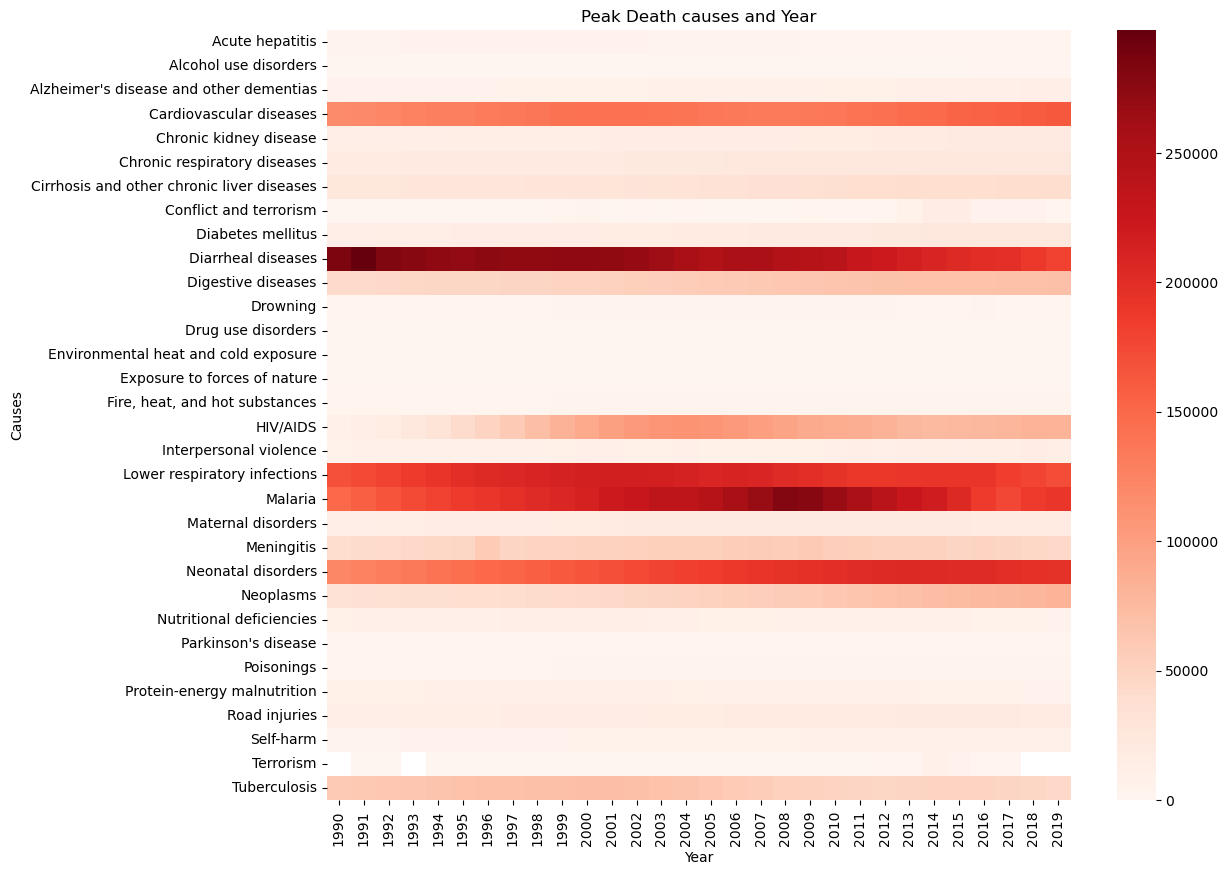

In [47]:
# Visualization to show the peak death causes and year
plt.figure(figsize=(12, 10))
sns.heatmap(a, cmap="Reds")
plt.title('Peak Death causes and Year')
plt.show()

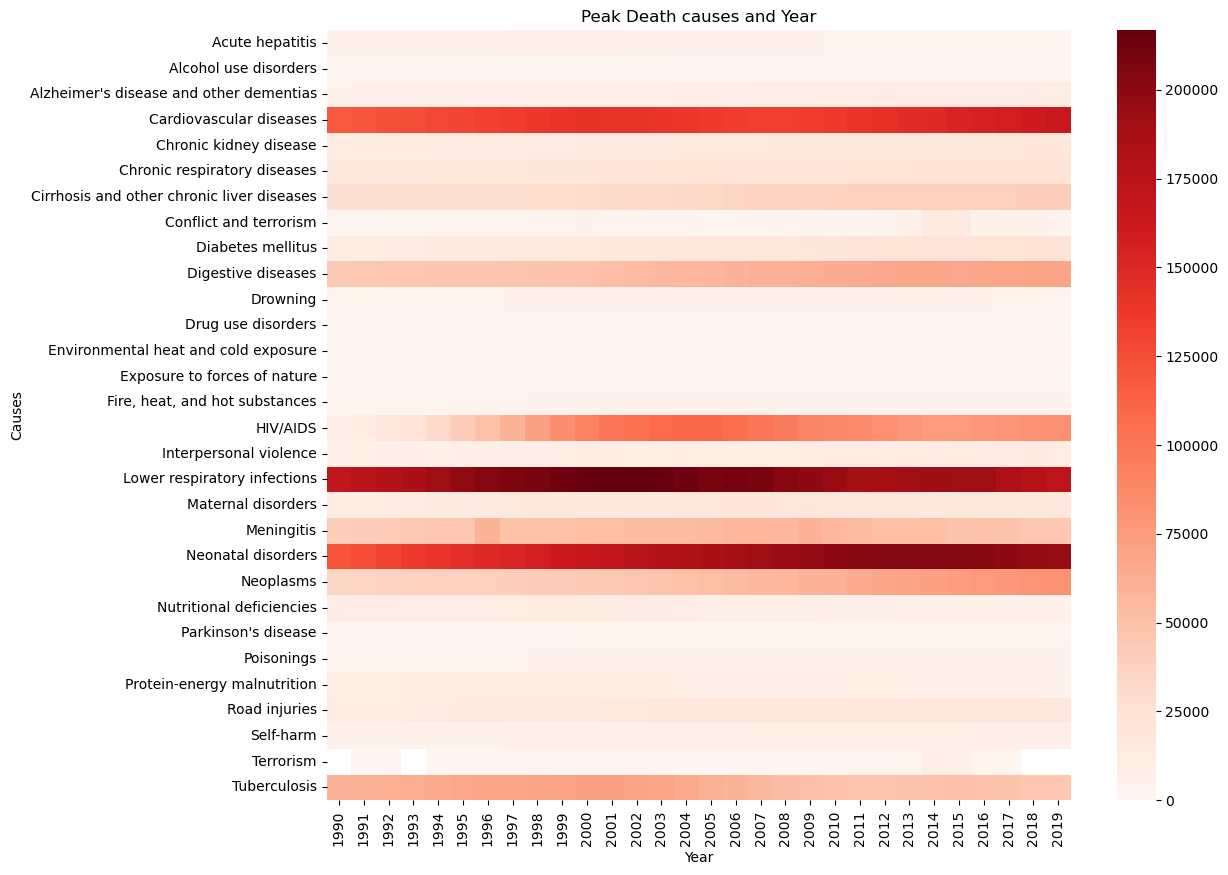

In [106]:
# drop top death causes for more analysis on other causes
removeTopData = df_Nig_deaths.drop(df_Nig_deaths[(df_Nig_deaths['Causes'] == 'Diarrheal diseases') | (df_Nig_deaths['Causes'] == 'Malaria')].index)

# visualization to show the peak death causes and year after dropping top two
plt.figure(figsize=(12, 10))
sns.heatmap(pd.pivot_table(removeTopData, values='Number of Deaths', columns='Year', index='Causes'), cmap="Reds")
plt.title('Peak Death causes and Year')
plt.show()

The first figure shows that diarrheal diseases had the highest peak of all other death causes, where it peaked at 1991. Malaria follows diarrheal disease peaking at 2008. As seen in the second figure Lower respiratory infections peaked in the early 2000s and Neonatal disorders peaked at 2013.

## CONCLUSION

There was an increase in number of deaths from 1990-2019 across the world, the major cause of these deaths were, Cardiovascular diseases, Neoplasms, chronic respiratory diseases. China recorded the highest number of deaths in the world.

Nigeria's total yearly deaths are steadily increasing and does not correlate with Nigeria's yearly birth, however there is an identified upwards trend. Nigeria's population is not declining as the annual births is 8x higher than the annual deaths. The three death causes that should recieve funding for awareness are  Diarrheal diseases, Malaria, Lower respiratory infections. The three least death causes are Terrorism, Drug disorders and Exposure to forces of nature. Diarrheal diseases at 1991 had the highest annual death of all other causes.